# Introduction

Notebook de avaliação de serviço BiopassID ICAO Check em comparação com ground truth FVC-ICAO.

# Import Libraries

In [2]:
%load_ext autoreload
%autoreload 2

In [47]:
import sys
import numpy as np
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.insert(0, '../../../../notebooks/')

from net_data_loaders.net_gt_loader import NetGTLoader
from gt_loaders.gt_names import GTName
from utils.constants import ICAO_REQ
from vsoft_evaluator import VsoftEvaluator, DataSource, DataPredSelection

# Load Ground Truth

In [4]:
net_gt_loader = NetGTLoader(aligned=False, gt_names=[GTName.FVC], requisites=list(ICAO_REQ), is_mtl_model=False)
train_data = net_gt_loader.load_gt_data(split='train')
valid_data = net_gt_loader.load_gt_data(split='validation')
test_data = net_gt_loader.load_gt_data(split='test')

Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)


# Load Vsoft Data

In [41]:
data_df = pd.read_csv('vsoft_data/compliance_check_vsoft_2.csv')
print('initial data_df.shape: ', data_df.shape)

ignore_imgs = data_df[data_df.mouth == -99].img_name
print('n_imgs to ignore: ', len(ignore_imgs))

data_df = data_df[~data_df.img_name.isin(ignore_imgs)]
print('data_df.shape after selection: ', data_df.shape)

valid_data = valid_data[~valid_data.img_name.isin(ignore_imgs)]
print('valid_data.shape after selection: ', valid_data.shape)
valid_data = valid_data.astype({c: float for c in valid_data.columns[2:]})

test_data = test_data[~test_data.img_name.isin(ignore_imgs)]
test_data = test_data.astype({c: float for c in test_data.columns[2:]})
print('test_data.shape after selection: ', test_data.shape)

initial data_df.shape:  (5763, 25)
n_imgs to ignore:  224
data_df.shape after selection:  (5539, 25)
valid_data.shape after selection:  (528, 26)
test_data.shape after selection:  (271, 26)


In [42]:
data_df.head()

,origin,img_name,mouth,rotation,l_away,eyes_closed,close,hat,dark_glasses,frames_heavy,...,sh_face,sh_head,blurred,ink_mark,skin_tone,washed_out,pixelation,hair_eyes,background,red_eyes
0,VSOFT,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,0.0,1.0,0.83,1.0,0.99,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,VSOFT,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,0.0,0.56,1.0,0.99,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,VSOFT,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,1.0,1.0,0.57,1.0,0.99,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,VSOFT,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,1.0,0.83,1.0,0.99,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,VSOFT,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,1.0,0.87,1.0,0.99,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


# Calculate Metrics

In [25]:
def select_vsoft_data(vsoft_data_df, data_src):
    if data_src == DataSource.TEST:
        return vsoft_data_df[vsoft_data_df.img_name.isin(test_data.img_name)]
    elif data_src == DataSource.VALIDATION:
        return vsoft_data_df[vsoft_data_df.img_name.isin(valid_data.img_name)]

## Test Split

Testing VSOFT BiopassID ICAO CHECK
Requisite: MOUTH


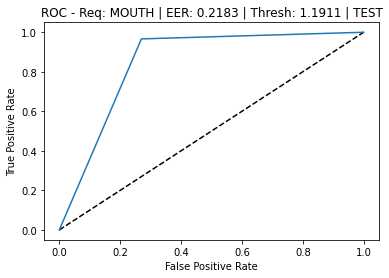

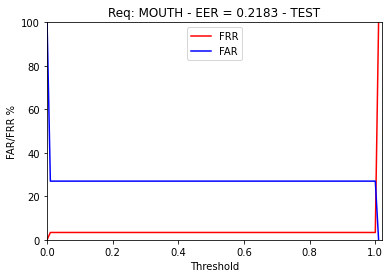

Requisite: MOUTH - EER_interp: 21.83% - Best Threshold: 1.1910611766158405
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.23      1.00      0.38        63
         1.0       0.00      0.00      0.00       208

    accuracy                           0.23       271
   macro avg       0.12      0.50      0.19       271
weighted avg       0.05      0.23      0.09       271

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 63 | FP: 0 | FN: 208
Accuracy ------------------------------------------------
Model Accuracy: 23.25%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: ROTATION


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


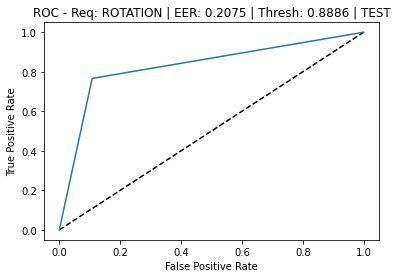

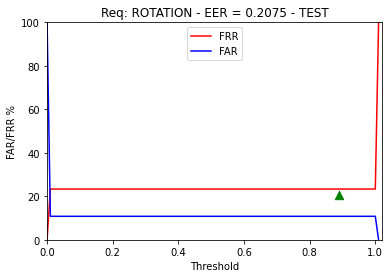

Requisite: ROTATION - EER_interp: 20.75% - Best Threshold: 0.8885773497499555
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.59      0.89      0.71        74
         1.0       0.95      0.77      0.85       197

    accuracy                           0.80       271
   macro avg       0.77      0.83      0.78       271
weighted avg       0.85      0.80      0.81       271

Confusion matrix ----------------------------------------
FAR: 10.81% | FRR: 23.35% | EER_mean: 17.080000000000002% | TP: 151 | TN: 66 | FP: 8 | FN: 46
Accuracy ------------------------------------------------
Model Accuracy: 80.07%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: L_AWAY


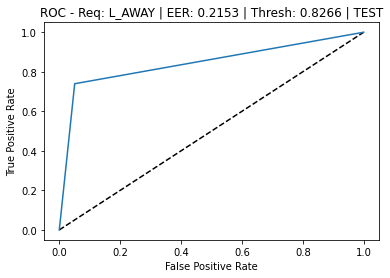

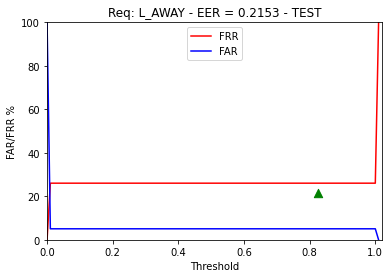

Requisite: L_AWAY - EER_interp: 21.529999999999998% - Best Threshold: 0.8265940054495129
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.60      0.95      0.74        79
         1.0       0.97      0.74      0.84       192

    accuracy                           0.80       271
   macro avg       0.79      0.84      0.79       271
weighted avg       0.86      0.80      0.81       271

Confusion matrix ----------------------------------------
FAR: 5.06% | FRR: 26.040000000000003% | EER_mean: 15.55% | TP: 142 | TN: 75 | FP: 4 | FN: 50
Accuracy ------------------------------------------------
Model Accuracy: 80.07%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: EYES_CLOSED


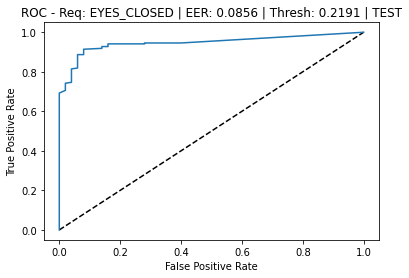

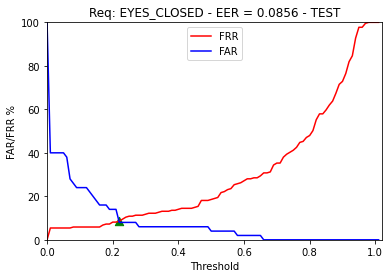

Requisite: EYES_CLOSED - EER_interp: 8.559999999999999% - Best Threshold: 0.21907433380084151
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.71      0.92      0.80        50
         1.0       0.98      0.91      0.95       221

    accuracy                           0.92       271
   macro avg       0.84      0.92      0.87       271
weighted avg       0.93      0.92      0.92       271

Confusion matrix ----------------------------------------
FAR: 8.0% | FRR: 8.6% | EER_mean: 8.3% | TP: 202 | TN: 46 | FP: 4 | FN: 19
Accuracy ------------------------------------------------
Model Accuracy: 91.51%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: CLOSE


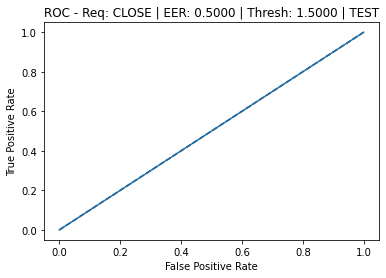

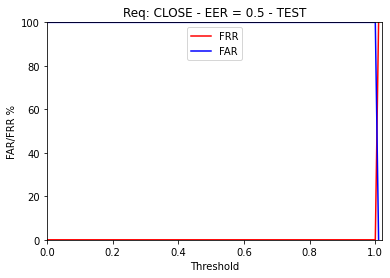

Requisite: CLOSE - EER_interp: 50.0% - Best Threshold: 1.5
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.01      1.00      0.01         2
         1.0       0.00      0.00      0.00       269

    accuracy                           0.01       271
   macro avg       0.00      0.50      0.01       271
weighted avg       0.00      0.01      0.00       271

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 2 | FP: 0 | FN: 269
Accuracy ------------------------------------------------
Model Accuracy: 0.74%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: HAT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


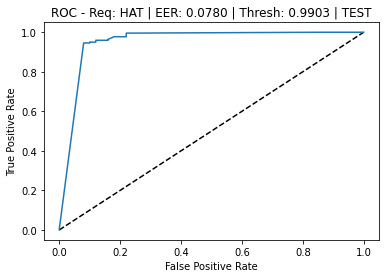

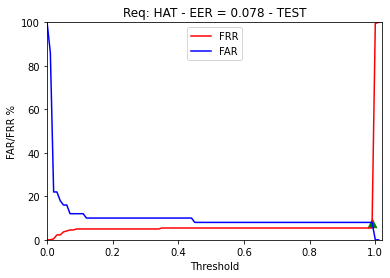

Requisite: HAT - EER_interp: 7.8% - Best Threshold: 0.9902516838000709
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.19      1.00      0.31        50
         1.0       1.00      0.00      0.01       221

    accuracy                           0.19       271
   macro avg       0.59      0.50      0.16       271
weighted avg       0.85      0.19      0.07       271

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 99.55000000000001% | EER_mean: 49.78% | TP: 1 | TN: 50 | FP: 0 | FN: 220
Accuracy ------------------------------------------------
Model Accuracy: 18.82%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: DARK_GLASSES


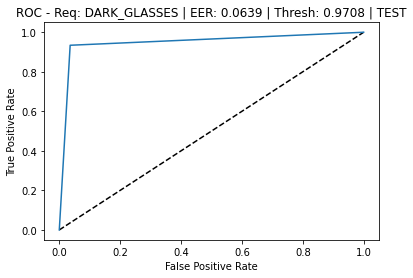

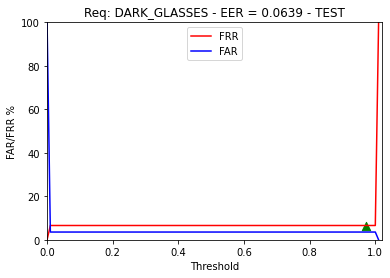

Requisite: DARK_GLASSES - EER_interp: 6.39% - Best Threshold: 0.9707518904265845
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.63      0.96      0.76        28
         1.0       1.00      0.93      0.96       243

    accuracy                           0.94       271
   macro avg       0.81      0.95      0.86       271
weighted avg       0.96      0.94      0.94       271

Confusion matrix ----------------------------------------
FAR: 3.5700000000000003% | FRR: 6.58% | EER_mean: 5.08% | TP: 227 | TN: 27 | FP: 1 | FN: 16
Accuracy ------------------------------------------------
Model Accuracy: 93.73%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: FRAMES_HEAVY


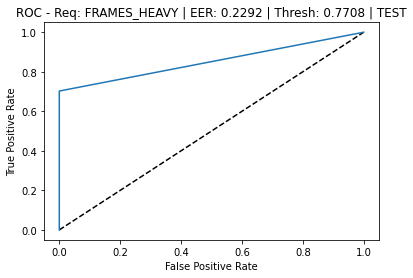

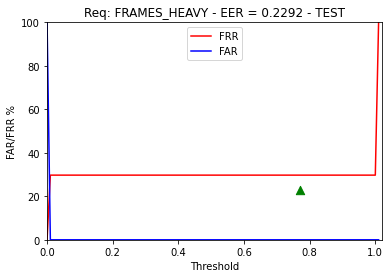

Requisite: FRAMES_HEAVY - EER_interp: 22.919999999999998% - Best Threshold: 0.7707736389684814
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.02      1.00      0.05         2
         1.0       1.00      0.70      0.83       269

    accuracy                           0.70       271
   macro avg       0.51      0.85      0.44       271
weighted avg       0.99      0.70      0.82       271

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 29.74% | EER_mean: 14.87% | TP: 189 | TN: 2 | FP: 0 | FN: 80
Accuracy ------------------------------------------------
Model Accuracy: 70.48%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: FRAME_EYES


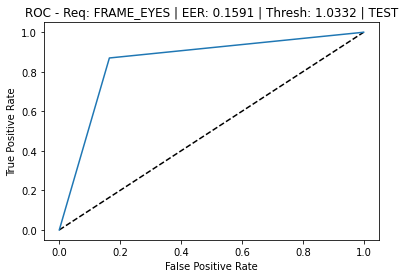

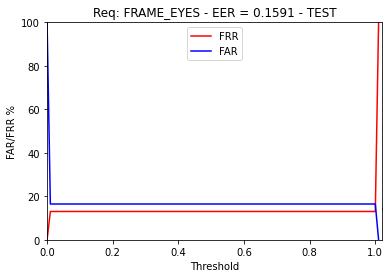

Requisite: FRAME_EYES - EER_interp: 15.909999999999998% - Best Threshold: 1.0332079801134553
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.29      1.00      0.45        79
         1.0       0.00      0.00      0.00       192

    accuracy                           0.29       271
   macro avg       0.15      0.50      0.23       271
weighted avg       0.08      0.29      0.13       271

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 79 | FP: 0 | FN: 192
Accuracy ------------------------------------------------
Model Accuracy: 29.15%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: FLASH_LENSES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


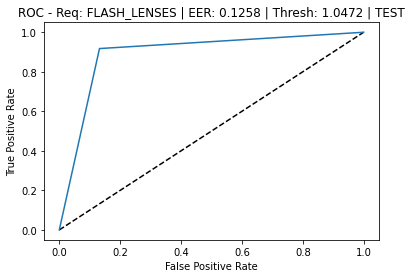

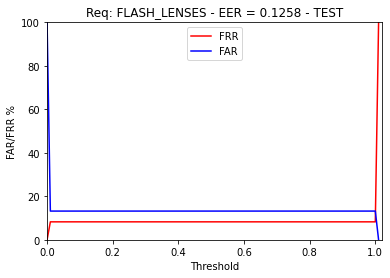

Requisite: FLASH_LENSES - EER_interp: 12.58% - Best Threshold: 1.0471713673099126
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.20      1.00      0.33        53
         1.0       0.00      0.00      0.00       218

    accuracy                           0.20       271
   macro avg       0.10      0.50      0.16       271
weighted avg       0.04      0.20      0.06       271

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 53 | FP: 0 | FN: 218
Accuracy ------------------------------------------------
Model Accuracy: 19.56%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: VEIL


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


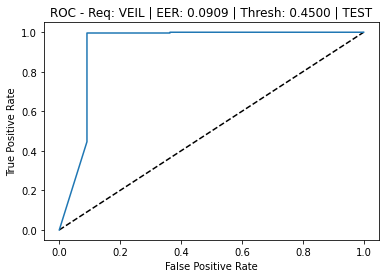

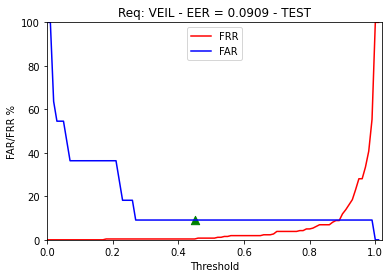

Requisite: VEIL - EER_interp: 9.09% - Best Threshold: 0.44999999999886403
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        11
         1.0       1.00      1.00      1.00       260

    accuracy                           0.99       271
   macro avg       0.95      0.95      0.95       271
weighted avg       0.99      0.99      0.99       271

Confusion matrix ----------------------------------------
FAR: 9.09% | FRR: 0.38% | EER_mean: 4.73% | TP: 259 | TN: 10 | FP: 1 | FN: 1
Accuracy ------------------------------------------------
Model Accuracy: 99.26%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: REFLECTION


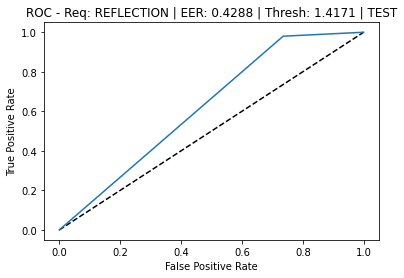

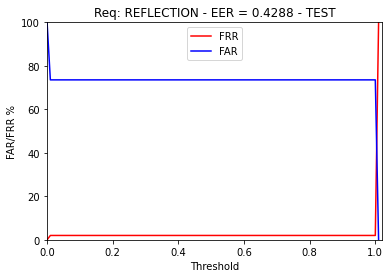

Requisite: REFLECTION - EER_interp: 42.88% - Best Threshold: 1.4170922054147799
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.45      1.00      0.62       121
         1.0       0.00      0.00      0.00       150

    accuracy                           0.45       271
   macro avg       0.22      0.50      0.31       271
weighted avg       0.20      0.45      0.28       271

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 121 | FP: 0 | FN: 150
Accuracy ------------------------------------------------
Model Accuracy: 44.65%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: LIGHT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


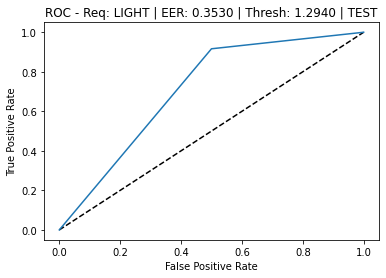

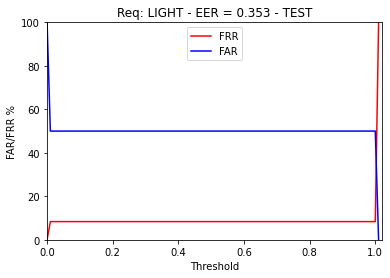

Requisite: LIGHT - EER_interp: 35.3% - Best Threshold: 1.2939521800281293
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.07      1.00      0.14        20
         1.0       0.00      0.00      0.00       251

    accuracy                           0.07       271
   macro avg       0.04      0.50      0.07       271
weighted avg       0.01      0.07      0.01       271

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 20 | FP: 0 | FN: 251
Accuracy ------------------------------------------------
Model Accuracy: 7.380000000000001%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: SH_FACE


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


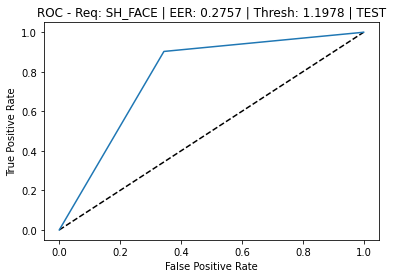

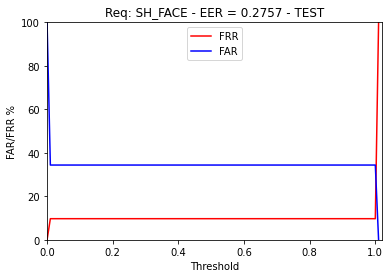

Requisite: SH_FACE - EER_interp: 27.57% - Best Threshold: 1.1978226615098122
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.35      1.00      0.52        96
         1.0       0.00      0.00      0.00       175

    accuracy                           0.35       271
   macro avg       0.18      0.50      0.26       271
weighted avg       0.13      0.35      0.19       271

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 96 | FP: 0 | FN: 175
Accuracy ------------------------------------------------
Model Accuracy: 35.42%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: SH_HEAD


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


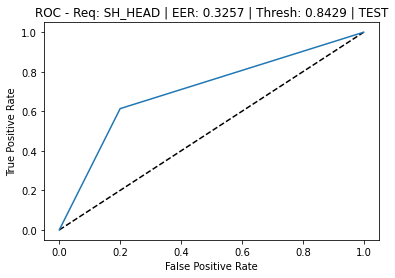

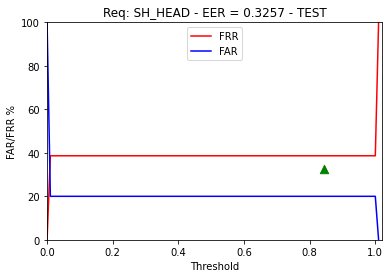

Requisite: SH_HEAD - EER_interp: 32.57% - Best Threshold: 0.8429118773946359
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.53      0.80      0.64        95
         1.0       0.85      0.61      0.71       176

    accuracy                           0.68       271
   macro avg       0.69      0.71      0.67       271
weighted avg       0.74      0.68      0.69       271

Confusion matrix ----------------------------------------
FAR: 20.0% | FRR: 38.64% | EER_mean: 29.32% | TP: 108 | TN: 76 | FP: 19 | FN: 68
Accuracy ------------------------------------------------
Model Accuracy: 67.9%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: BLURRED


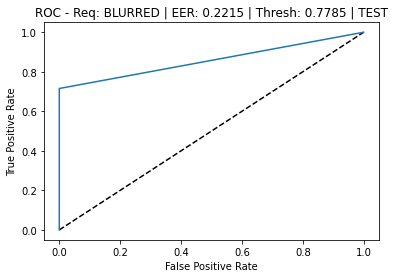

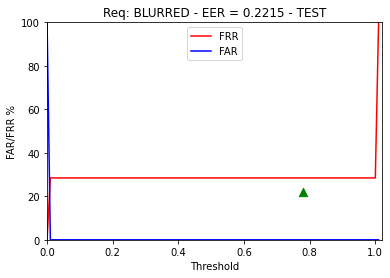

Requisite: BLURRED - EER_interp: 22.15% - Best Threshold: 0.7785016286644951
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.32      1.00      0.48        32
         1.0       1.00      0.72      0.83       239

    accuracy                           0.75       271
   macro avg       0.66      0.86      0.66       271
weighted avg       0.92      0.75      0.79       271

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 28.449999999999996% | EER_mean: 14.219999999999999% | TP: 171 | TN: 32 | FP: 0 | FN: 68
Accuracy ------------------------------------------------
Model Accuracy: 74.91%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: SKIN_TONE


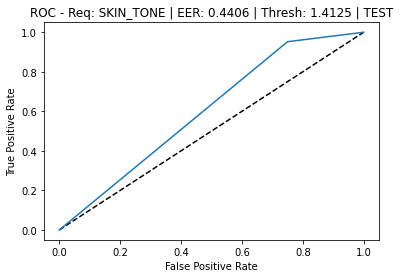

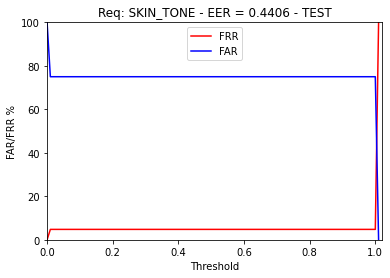

Requisite: SKIN_TONE - EER_interp: 44.06% - Best Threshold: 1.4124890061565523
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.38      1.00      0.55       104
         1.0       0.00      0.00      0.00       167

    accuracy                           0.38       271
   macro avg       0.19      0.50      0.28       271
weighted avg       0.15      0.38      0.21       271

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 104 | FP: 0 | FN: 167
Accuracy ------------------------------------------------
Model Accuracy: 38.379999999999995%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: WASHED_OUT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


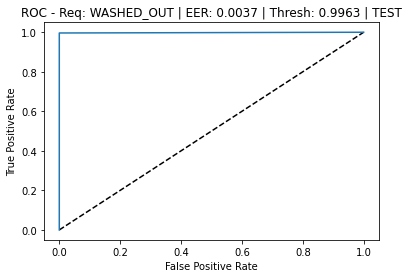

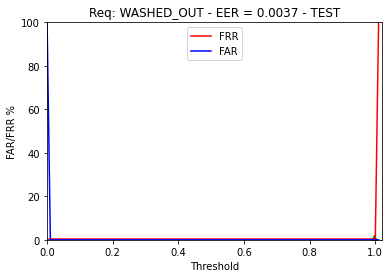

Requisite: WASHED_OUT - EER_interp: 0.37% - Best Threshold: 0.996268656716418
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         4
         1.0       1.00      1.00      1.00       267

    accuracy                           1.00       271
   macro avg       0.90      1.00      0.94       271
weighted avg       1.00      1.00      1.00       271

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 0.37% | EER_mean: 0.18% | TP: 266 | TN: 4 | FP: 0 | FN: 1
Accuracy ------------------------------------------------
Model Accuracy: 99.63%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: PIXELATION


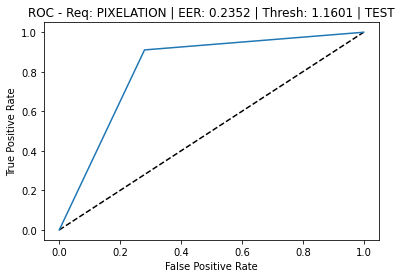

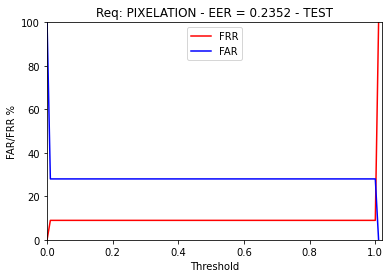

Requisite: PIXELATION - EER_interp: 23.52% - Best Threshold: 1.1600655558590547
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.09      1.00      0.17        25
         1.0       0.00      0.00      0.00       246

    accuracy                           0.09       271
   macro avg       0.05      0.50      0.08       271
weighted avg       0.01      0.09      0.02       271

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 25 | FP: 0 | FN: 246
Accuracy ------------------------------------------------
Model Accuracy: 9.229999999999999%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: HAIR_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


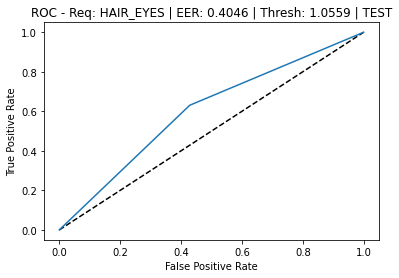

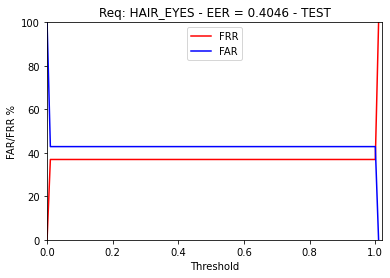

Requisite: HAIR_EYES - EER_interp: 40.46% - Best Threshold: 1.0558930741190766
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.18      1.00      0.31        49
         1.0       0.00      0.00      0.00       222

    accuracy                           0.18       271
   macro avg       0.09      0.50      0.15       271
weighted avg       0.03      0.18      0.06       271

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 49 | FP: 0 | FN: 222
Accuracy ------------------------------------------------
Model Accuracy: 18.08%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: BACKGROUND


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


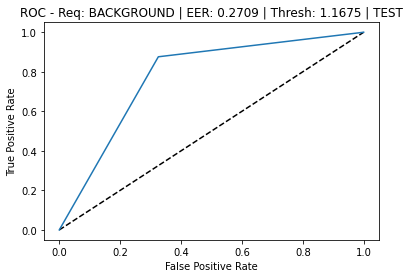

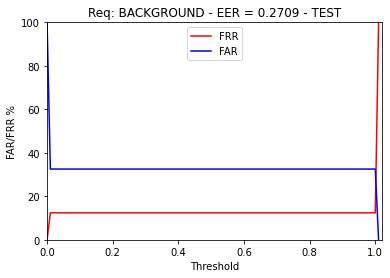

Requisite: BACKGROUND - EER_interp: 27.089999999999996% - Best Threshold: 1.1675399826855606
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.46      1.00      0.63       126
         1.0       0.00      0.00      0.00       145

    accuracy                           0.46       271
   macro avg       0.23      0.50      0.32       271
weighted avg       0.22      0.46      0.30       271

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 126 | FP: 0 | FN: 145
Accuracy ------------------------------------------------
Model Accuracy: 46.489999999999995%
---------------------------------------------------------
Testing VSOFT BiopassID ICAO CHECK
Requisite: RED_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


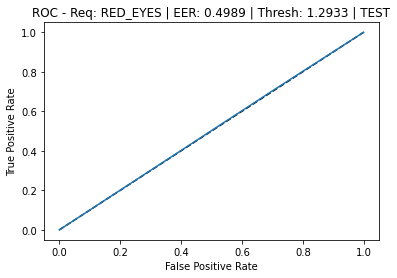

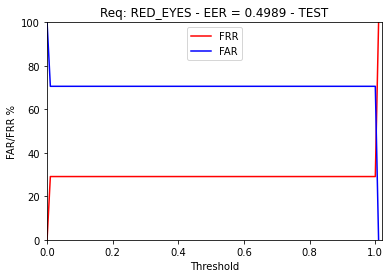

Requisite: RED_EYES - EER_interp: 49.89% - Best Threshold: 1.2932728647014362
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.19      1.00      0.32        51
         1.0       0.00      0.00      0.00       220

    accuracy                           0.19       271
   macro avg       0.09      0.50      0.16       271
weighted avg       0.04      0.19      0.06       271

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 51 | FP: 0 | FN: 220
Accuracy ------------------------------------------------
Model Accuracy: 18.82%
---------------------------------------------------------


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
data_src = DataSource.TEST

for req in list(ICAO_REQ):
    if req != ICAO_REQ.INK_MARK:
        tmp_df = select_vsoft_data(data_df, data_src)
        y_true = test_data[req.value].values
        y_hat = tmp_df[req.value].values
        img_paths = test_data.img_name.values
        
        vsoft_ev = VsoftEvaluator(data_src, img_paths, y_true, y_hat, req)
        vsoft_ev.calculate_metrics()

# Vizualize Predictions

## Dark Glasses

Creating VsoftEvaluator
 .. Data source: TEST
 .. Requisite: DARK_GLASSES
 .. n img_paths: 271
 .. n y_true: 271
 .. n y_hat: 271
Testing VSOFT BiopassID ICAO CHECK
Requisite: DARK_GLASSES


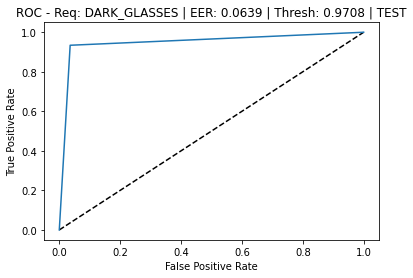

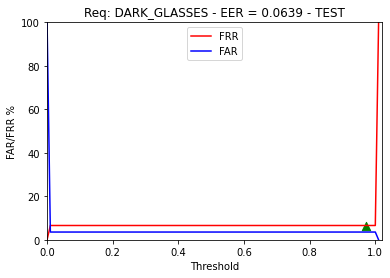

Requisite: DARK_GLASSES - EER_interp: 6.39% - Best Threshold: 0.9707518904265845
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.63      0.96      0.76        28
         1.0       1.00      0.93      0.96       243

    accuracy                           0.94       271
   macro avg       0.81      0.95      0.86       271
weighted avg       0.96      0.94      0.94       271

Confusion matrix ----------------------------------------
FAR: 3.5700000000000003% | FRR: 6.58% | EER_mean: 5.08% | TP: 227 | TN: 27 | FP: 1 | FN: 16
Accuracy ------------------------------------------------
Model Accuracy: 93.73%
---------------------------------------------------------


In [81]:
data_src = DataSource.TEST
req = ICAO_REQ.DARK_GLASSES

tmp_df = select_vsoft_data(data_df, data_src)

y_true = test_data[req.value].values
y_hat = tmp_df[req.value].values
img_paths = test_data.img_name.values

vsoft_ev = VsoftEvaluator(data_src, img_paths, y_true, y_hat, req)
vsoft_ev.calculate_metrics()

### Any Images

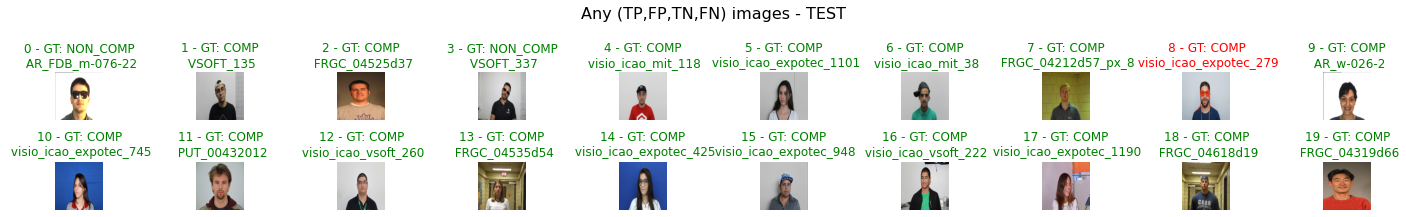

In [82]:
vsoft_ev.vizualize_predictions(n_imgs=20)

### False Positives

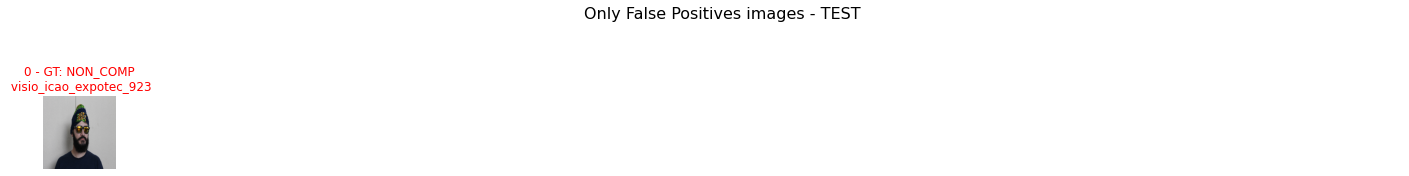

In [83]:
vsoft_ev.vizualize_predictions(n_imgs=10, data_pred_selection=DataPredSelection.ONLY_FP)

### False Negatives

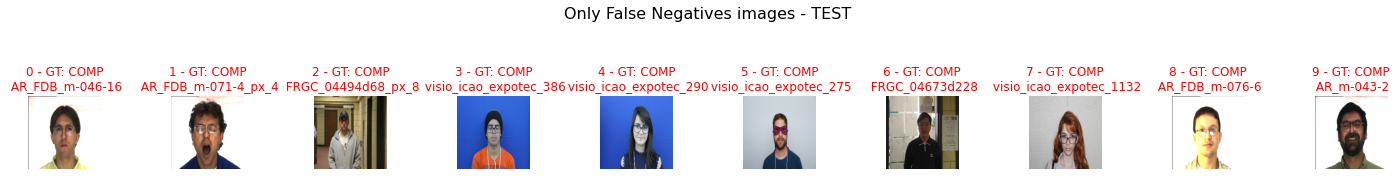

In [84]:
vsoft_ev.vizualize_predictions(n_imgs=10, data_pred_selection=DataPredSelection.ONLY_FN)

### True Positives

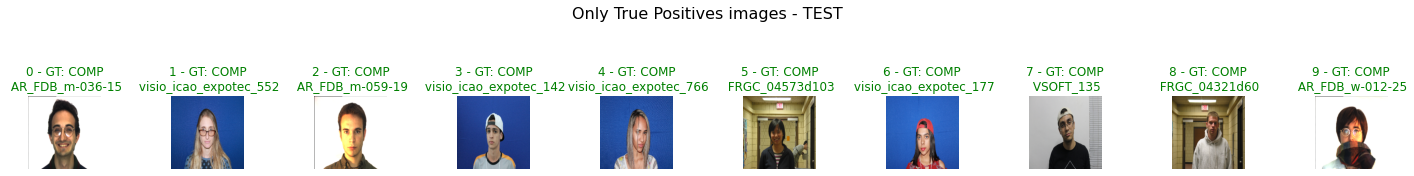

In [85]:
vsoft_ev.vizualize_predictions(n_imgs=10, data_pred_selection=DataPredSelection.ONLY_TP)

### True Negatives

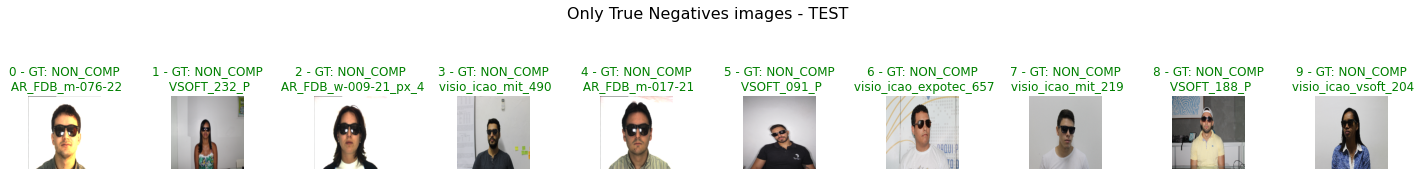

In [86]:
vsoft_ev.vizualize_predictions(n_imgs=10, data_pred_selection=DataPredSelection.ONLY_TN)

## Close

Creating VsoftEvaluator
 .. Data source: TEST
 .. Requisite: CLOSE
 .. n img_paths: 271
 .. n y_true: 271
 .. n y_hat: 271
Testing VSOFT BiopassID ICAO CHECK
Requisite: CLOSE


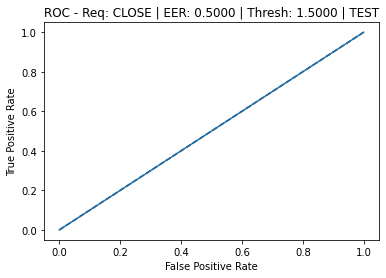

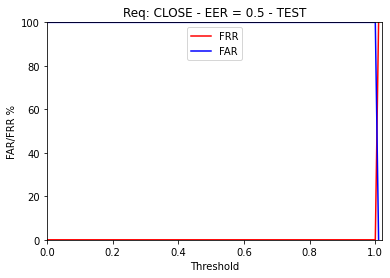

Requisite: CLOSE - EER_interp: 50.0% - Best Threshold: 1.5
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.01      1.00      0.01         2
         1.0       0.00      0.00      0.00       269

    accuracy                           0.01       271
   macro avg       0.00      0.50      0.01       271
weighted avg       0.00      0.01      0.00       271

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 2 | FP: 0 | FN: 269
Accuracy ------------------------------------------------
Model Accuracy: 0.74%
---------------------------------------------------------


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
data_src = DataSource.TEST
req = ICAO_REQ.CLOSE

tmp_df = select_vsoft_data(data_df, data_src)

y_true = test_data[req.value].values
y_hat = tmp_df[req.value].values
img_paths = test_data.img_name.values

vsoft_ev = VsoftEvaluator(data_src, img_paths, y_true, y_hat, req)
vsoft_ev.calculate_metrics()

### Any Images

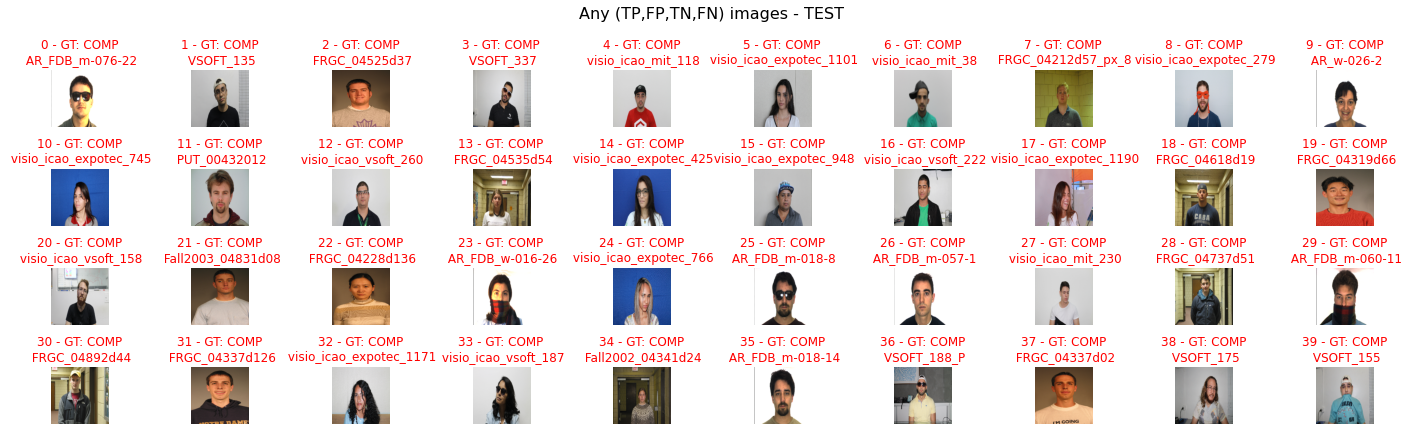

In [89]:
vsoft_ev.vizualize_predictions(n_imgs=40)

### False Positives

In [90]:
vsoft_ev.vizualize_predictions(n_imgs=10, data_pred_selection=DataPredSelection.ONLY_FP)

### False Negatives

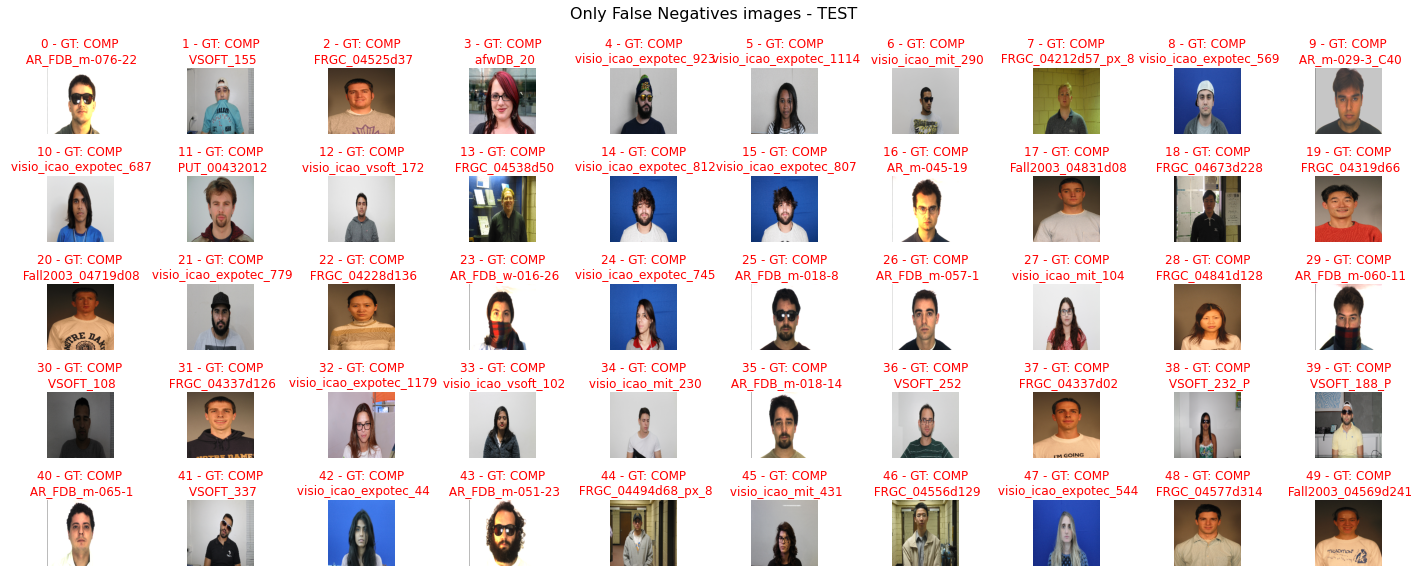

In [95]:
vsoft_ev.vizualize_predictions(n_imgs=50, data_pred_selection=DataPredSelection.ONLY_FN)

### True Positives

In [92]:
vsoft_ev.vizualize_predictions(n_imgs=10, data_pred_selection=DataPredSelection.ONLY_TP)

### True Negatives

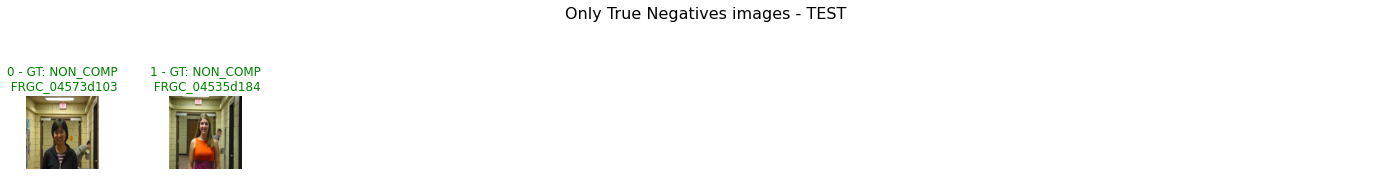

In [93]:
vsoft_ev.vizualize_predictions(n_imgs=10, data_pred_selection=DataPredSelection.ONLY_TN)

## Background

Creating VsoftEvaluator
 .. Data source: TEST
 .. Requisite: BACKGROUND
 .. n img_paths: 271
 .. n y_true: 271
 .. n y_hat: 271
Testing VSOFT BiopassID ICAO CHECK
Requisite: BACKGROUND


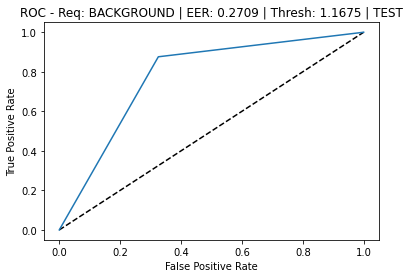

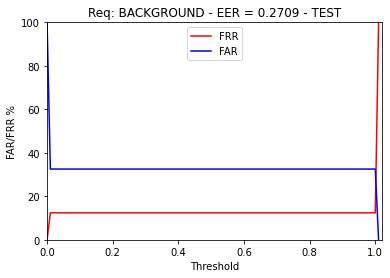

Requisite: BACKGROUND - EER_interp: 27.089999999999996% - Best Threshold: 1.1675399826855606
Classification report -----------------------------------
              precision    recall  f1-score   support

         0.0       0.46      1.00      0.63       126
         1.0       0.00      0.00      0.00       145

    accuracy                           0.46       271
   macro avg       0.23      0.50      0.32       271
weighted avg       0.22      0.46      0.30       271

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 126 | FP: 0 | FN: 145
Accuracy ------------------------------------------------
Model Accuracy: 46.489999999999995%
---------------------------------------------------------


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
data_src = DataSource.TEST
req = ICAO_REQ.BACKGROUND

tmp_df = select_vsoft_data(data_df, data_src)

y_true = test_data[req.value].values
y_hat = tmp_df[req.value].values
img_paths = test_data.img_name.values

vsoft_ev = VsoftEvaluator(data_src, img_paths, y_true, y_hat, req)
vsoft_ev.calculate_metrics()

### Any Images

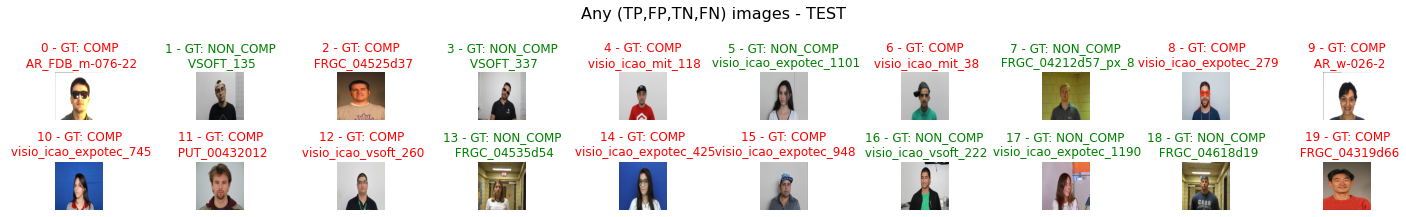

In [97]:
vsoft_ev.vizualize_predictions(n_imgs=20)

### False Positives

In [98]:
vsoft_ev.vizualize_predictions(n_imgs=10, data_pred_selection=DataPredSelection.ONLY_FP)

### False Negatives

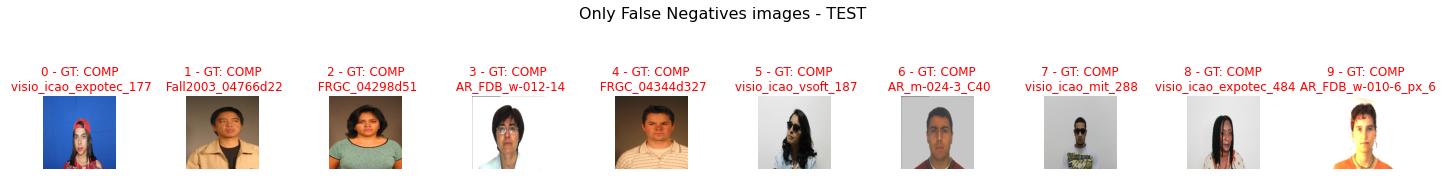

In [99]:
vsoft_ev.vizualize_predictions(n_imgs=10, data_pred_selection=DataPredSelection.ONLY_FN)

### True Positives

In [100]:
vsoft_ev.vizualize_predictions(n_imgs=10, data_pred_selection=DataPredSelection.ONLY_TP)

### True Negatives

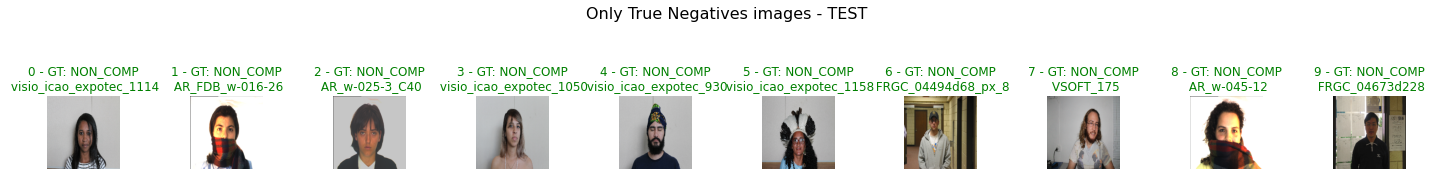

In [101]:
vsoft_ev.vizualize_predictions(n_imgs=10, data_pred_selection=DataPredSelection.ONLY_TN)